# Portfolio 3 - Clustering Visualisation

K-means clustering is one of the simplest and popular unsupervised learning algorithms. Typically, unsupervised algorithms make inferences from datasets using only input vectors without referring to known, or labelled, outcomes. This notebook illustrates the process of K-means clustering by generating some random clusters of data and then showing the iterations of the algorithm as random cluster means are updated. 

We first generate random data around 4 centers.

In [26]:
import numpy as np 
import pandas as pd 
from sklearn.cluster import KMeans
from copy import deepcopy
import random
from matplotlib import pyplot as plt
from collections import Counter
%matplotlib inline

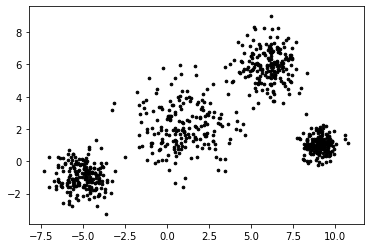

In [27]:
center_1 = np.array([1,2])
center_2 = np.array([6,6])
center_3 = np.array([9,1])
center_4 = np.array([-5,-1])

# Generate random data and center it to the four centers each with a different variance
np.random.seed(5)
data_1 = np.random.randn(200,2) * 1.5 + center_1
data_2 = np.random.randn(200,2) * 1 + center_2
data_3 = np.random.randn(200,2) * 0.5 + center_3
data_4 = np.random.randn(200,2) * 0.8 + center_4

data = np.concatenate((data_1, data_2, data_3, data_4), axis = 0)

plt.scatter(data[:,0], data[:,1], s=7, c='k')
plt.show()

## 1. Generate random cluster centres

You need to generate four random centres.

This part of portfolio should contain at least:  
- The number of clusters `k` is set to 4;
- Generate random centres via `centres = np.random.randn(k,c)*std + mean` where `std` and `mean` are the standard deviation and mean of the data. `c` represents the number of features in the data. Set the random seed to 6.
- Color the generated centers with `green`, `blue`, `yellow`, and `cyan`. Set the edgecolors to `red`.

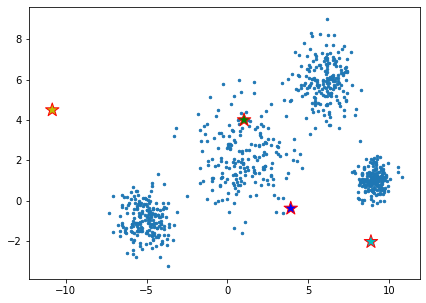

In [28]:
np.random.seed(6)
k = 4
# centroids[i] = [x, y]
n = data.shape[0]
# Number of features in the data
c = data.shape[1]

# Generate random centers, here we use sigma and mean to ensure it represent the whole data
mean = np.mean(data, axis = 0)
std = np.std(data, axis = 0)

centres = np.random.randn(k,c)*std + mean

fig = plt.figure(figsize=(7, 5))
plt.scatter(data[:,0], data[:,1], s=6)
plt.scatter(centres[:,0],centres[:,1],marker="*",c=['g','b','y','c'],s=200,edgecolor="r")
plt.show()

# Intrepretation
Random series has been generated and clusters are chosen 4 (k=4), n and c defines the shape of the dataset. Centres are generated as per the given formula in the description above (**np.random.randn(k,c)*std + mean**, where std is the standard deviation - measure that is used to depict the amount of variation of data values from the avrerage value and mean is the average of the values). There are 4 centres generated with color green, blue, yellow and cyan colors , their edges are red color as per the requirement and size 200 and shape is defined as a star.

## 2. Visualise the clustering results in each iteration

You need to implement the process of k-means clustering.  Implement each iteration as a seperate cell, assigning each data point to the closest centre, then updating the cluster centres based on the data, then plot the new clusters.

Replace this text with your explaination of the algorithm.  The resulting notebook should provide a good explanation and demonstration of the K-means algorithm.

In [29]:
old_centres = np.zeros(centres.shape) 
new_centres = deepcopy(centres)

data.shape
clusters = np.zeros(n)
distances = np.zeros((n,k))

difference = np.linalg.norm(new_centres - old_centres)
while difference != 0:
    for i in range(k):
        distances[:,i] = np.linalg.norm(data - centres[i], axis=1)
    clusters = np.argmin(distances, axis = 1)
    
    old_centres = deepcopy(new_centres)
    for i in range(k):
        new_centres[i] = np.mean(data[clusters == i], axis=0)
    difference = np.linalg.norm(new_centres - old_centres)
new_centres


array([[ 1.58392517,  3.13131474],
       [ 3.4332107 ,  1.63845204],
       [-5.81842424, -0.91474775],
       [ 9.063639  ,  1.04633907]])

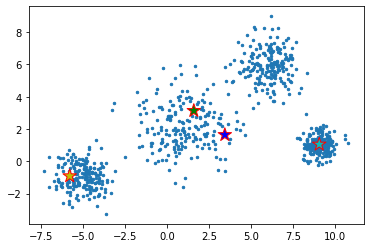

In [31]:
plt.scatter(data[:,0], data[:,1], s=6)
plt.scatter(new_centres[:,0],new_centres[:,1],marker="*",c=['g','b','y','c'],s=200,edgecolor="r")
plt.show()

# Intrepretation
Centres are reassgined to the closest dataset. K-means clustering algo is applied. We can see that now centriods are placed in more readable manner i.e., every centroid has closest dataset not randomly assigned.